In [474]:
# widing my cells 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [475]:
def sub(x):
    df['Color'].loc[df[df['Color'].isin(x)].index] = x[0]  
    
def other_sub(x):
    if df[df.Color == x]['Color'].count() < 10:
        df.drop(df[df['Color'] == x].index,inplace=True)

In [476]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from datasist.structdata import detect_outliers
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
sns.set_theme(context = 'poster' , style = 'ticks' , palette = 'magma' , font_scale = 0.6 , rc = {'figure.figsize':[18 , 8]})

In [477]:
df = pd.read_csv('Stars.csv')

In [478]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiant


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [480]:
df.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [481]:
df.duplicated().sum()

0

## Univariant Analysis

Text(0.5, 1.0, 'Absolute Magnitude Distribution')

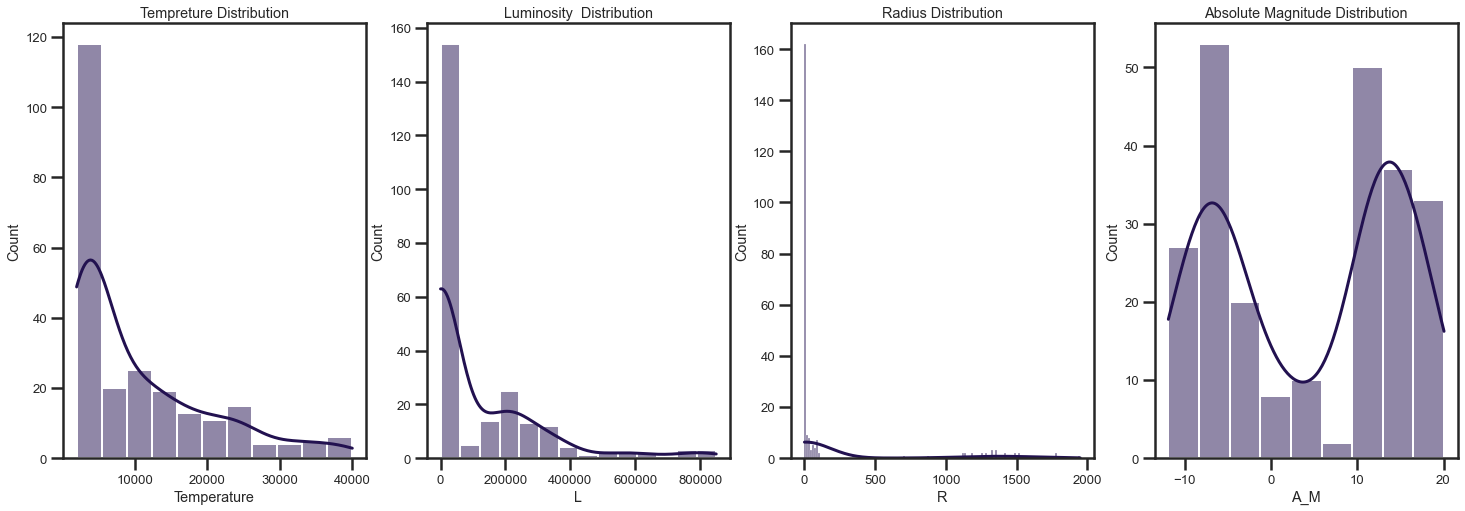

In [482]:
# Creating a grid figure with matplotlib
fig, my_grid = plt.subplots(nrows=1, ncols=4, figsize=(25,8))


# First plot
a = sns.histplot(df['Temperature'],kde=True,ax=my_grid[0])
a.set_title('Tempreture Distribution')

# Second plot
a = sns.histplot(df['L'],kde=True,ax=my_grid[1]) # bar plot 2 data
a.set_title('Luminosity  Distribution')

# third plot
a = sns.histplot(df['R'],kde=True,ax=my_grid[2]) # bar plot 2 data
a.set_title('Radius Distribution')

#4rth plot
a = sns.histplot(df['A_M'],kde=True,ax=my_grid[3]) # bar plot 2 data
a.set_title('Absolute Magnitude Distribution')

In [483]:
detect_outliers(df, 0, ['Temperature'])

[30, 49, 99, 100, 101, 109, 159, 214, 231, 235, 239]

In [484]:
detect_outliers(df, 0, ['L'])

[53, 101, 172, 223, 226, 227, 229, 232, 233, 234, 236, 237]

In [485]:
len(detect_outliers(df, 0, ['R']))

40

In [486]:
detect_outliers(df, 0, ['A_M'])

[]

<AxesSubplot:xlabel='R'>

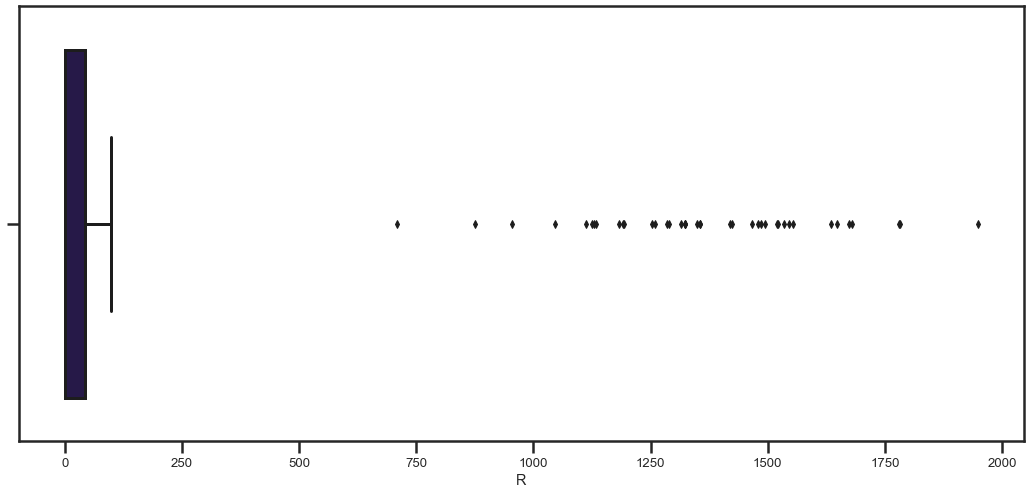

In [487]:
sns.boxplot(df['R'])

<AxesSubplot:xlabel='R', ylabel='Count'>

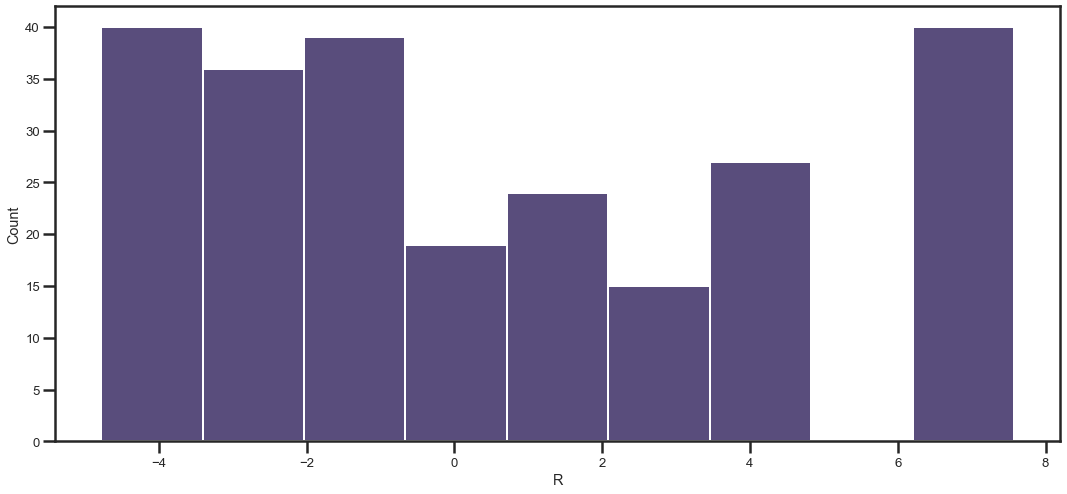

In [488]:
sns.histplot(np.log(df['R']))

In [489]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [490]:
df.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [491]:
colors_resub = [['Blue-White', 'Blue White', 'Blue white','Blue-White','Blue-white'],
                ['White','white','Whitish'],  ['Yellow-White', 'White-Yellow', 'Yellowish White','yellow-white'],
                ['Yellow','yellowish','Yellowish']]

In [492]:
## cleaning the colors missmatch writing 
for colors in colors_resub: 
    sub(colors)

In [493]:
# delete colors that has a frequency less than 10  
for color in df['Color'].unique().tolist():
    other_sub(color)

In [494]:
df.Color.value_counts()

Red             112
Blue             56
Blue-White       41
White            12
Yellow-White     12
Name: Color, dtype: int64

In [423]:
df.Type.value_counts()

Brown Dwarf      40
Red Dwarf        40
Supergiant       40
White Dwarf      39
Main Sequence    36
Hypergiant        3
Name: Type, dtype: int64

In [424]:
df.Spectral_Class.value_counts()

M    91
B    40
O    34
A    17
F    16
Name: Spectral_Class, dtype: int64

In [425]:
for clas in df['Spectral_Class'].unique().tolist():
    if df[df.Spectral_Class == clas]['Spectral_Class'].count() < 10:
        df.drop(df[df['Spectral_Class'] == clas].index,inplace=True)

In [426]:
df.Spectral_Class.value_counts()

M    91
B    40
O    34
A    17
F    16
Name: Spectral_Class, dtype: int64

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [428]:
target_encoder,features_encoder, O_enc = LabelEncoder(),LabelEncoder(), OneHotEncoder(sparse=False, drop='first')

In [429]:
df['Type'] = target_encoder.fit_transform(df['Type'])

In [430]:
df['Spectral_Class'] = features_encoder.fit_transform(df['Spectral_Class'])

In [431]:
colors = O_enc.fit_transform(df[['Color']])
colors  = pd.DataFrame(colors, columns=O_enc.get_feature_names_out())
colors

,Color_Blue-White,Color_Red,Color_White,Color_Yellow-White
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
193,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0


In [432]:
df.reset_index(drop=True,inplace=True)

In [433]:
df = pd.concat([df.drop(columns=['Color']),colors],axis=1)

In [434]:
df

,Temperature,L,R,A_M,Spectral_Class,Type,Color_Blue-White,Color_Red,Color_White,Color_Yellow-White
0,3068,0.002400,0.1700,16.120,3,0,0.0,1.0,0.0,0.0
1,3042,0.000500,0.1542,16.600,3,0,0.0,1.0,0.0,0.0
2,2600,0.000300,0.1020,18.700,3,0,0.0,1.0,0.0,0.0
3,2800,0.000200,0.1600,16.650,3,0,0.0,1.0,0.0,0.0
4,1939,0.000138,0.1030,20.060,3,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
193,18734,224780.000000,46.0000,-7.450,4,4,0.0,0.0,0.0,0.0
194,9892,593900.000000,80.0000,-7.262,4,4,0.0,0.0,0.0,0.0
195,10930,783930.000000,25.0000,-6.224,4,4,0.0,0.0,0.0,0.0
196,23095,347820.000000,86.0000,-5.905,4,4,0.0,0.0,0.0,0.0


In [435]:
x = df.drop(columns=['Type'])
y = df['Type']

In [436]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [437]:
scaler = RobustScaler()

In [438]:
columns_to_be_scaled = x_train.select_dtypes(include='number').columns
columns_to_be_scaled

Index(['Temperature', 'L', 'R', 'A_M', 'Spectral_Class', 'Color_Blue-White',
       'Color_Red', 'Color_White', 'Color_Yellow-White'],
      dtype='object')

In [439]:
x_train[columns_to_be_scaled] = scaler.fit_transform(x_train[columns_to_be_scaled])
x_test[columns_to_be_scaled] = scaler.transform(x_test[columns_to_be_scaled])

In [440]:
from sklearn.linear_model import LogisticRegression

In [441]:
model = LogisticRegression(multi_class='ovr')

In [442]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [443]:
y_test_pred =model.predict(x_test)
y_train_pred = model.predict(x_train)

Train accuracy is  0.9873417721518988
Test accuracy is  1.0


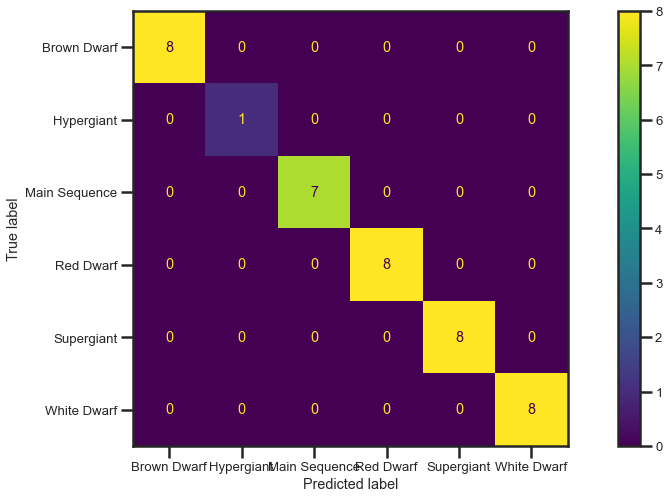

In [444]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

print("Train accuracy is " , accuracy_score(y_train , y_train_pred))
print("Test accuracy is " , accuracy_score(y_test , y_test_pred))

cm = confusion_matrix(y_test , y_test_pred )
ConfusionMatrixDisplay(cm , display_labels=target_encoder.inverse_transform(model.classes_)).plot()